In [50]:
import pandas as pd
data=pd.read_csv("LoanStats3a.csv")
data.shape

(42542, 145)

In [51]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import re

In [52]:
empty_cols = [i for i in range(54,144)]   #more empty columns
data = data.drop(data.columns[empty_cols],axis=1)

In [53]:
data.head()
data.shape

(42542, 55)

In [54]:
del_col_names = ["id","emp_title","desc","sub_grade","title","addr_state","member_id","application_type","purpose","url","last_credit_pull_d","mths_since_last_delinq","zip_code","last_pymnt_d","next_pymnt_d","pymnt_plan","mths_since_last_record","next_pymnt_d","mths_since_last_major_derog","pub_rec","dti","delinq_2yrs","earliest_cr_line","initial_list_status","out_prncp","out_prncp_inv","collections_12_mths_ex_med","annual_inc_joint","issue_d"]
data = data.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",data.shape)


Current shape of dataset : (42542, 27)


In [55]:
data["home_ownership"] = data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1,"nan":np.nan})


In [56]:
data["loan_status"] = data["loan_status"].map({"Fully Paid":1,"Charged Off":0,"Does not meet the credit policy. Status:Fully Paid":0,
                                                "Does not meet the credit policy. Status:Charged Off":0,"nan":np.nan})

In [57]:
data["grade"] = data["grade"].map({"A":7,"B":6,"C":5,"D":4,"E":3,"F":2,"G":1,"nan":np.nan})

In [58]:
 data["verification_status"] = data["verification_status"].map({'Verified':0,'Source Verified':1,'Not Verified':2,'nan':np.nan})

In [59]:
for x in range(0,len(data["emp_length"])):
    if(not pd.isna(data["emp_length"][x])):
        data.iloc[x,data.columns.get_loc("emp_length")]=re.search(r'\d+',str(data["emp_length"][x])).group()

In [60]:
for x in range(0,len(data["term"])):
    if(not pd.isna(data["term"][x])):
        data.iloc[x,data.columns.get_loc("term")]=re.search(r'\d+',str(data["term"][x])).group()

In [61]:
for x in range(0,len(data["int_rate"])):
    if(not pd.isna(data["int_rate"][x])):
        data.iloc[x,data.columns.get_loc("int_rate")]=re.search(r'\d+',str(data["int_rate"][x])).group()

In [62]:
for x in range(0,len(data["revol_util"])):
    if(not pd.isna(data["revol_util"][x])):
        data.iloc[x,data.columns.get_loc("revol_util")]=re.search(r'\d+',str(data["revol_util"][x])).group()

In [63]:
del_col_names = ["settlement_term"]
data = data.drop(labels = del_col_names, axis = 1)

#Reordering of columns
data = data[["loan_amnt","funded_amnt","funded_amnt_inv","installment","grade","home_ownership","annual_inc","verification_status","inq_last_6mths","open_acc","revol_bal","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","policy_code","emp_length","term","revol_util","int_rate","loan_status"]]

In [64]:
data.to_csv("scaled_data.csv", sep='\t')

In [65]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'emp_length', 'term', 'revol_util', 'int_rate', 'loan_status'],
      dtype='object')

In [66]:
list1 = ["emp_length","term","revol_util","int_rate"]
def modify1():
     for i in range(0,len(list1)):
            val = list1[i]
            for x in range(0,len(val)):
                if pd.isna(data[val][x]):
                    data[val][x] = np.nan

list2 = ["loan_amnt","funded_amnt","funded_amnt_inv","installment","grade","home_ownership","annual_inc","verification_status","loan_status","inq_last_6mths","open_acc","revol_bal","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","policy_code"]
def modify2():
    for i in range(0,len(list2)):
        val = list2[i]
        for x in range(0,len(val)):
            if pd.isnull(data[val][x]):
                data[val][x] = np.nan
modify1()
modify2()
        

In [67]:
df = pd.DataFrame(data)
df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,home_ownership,annual_inc,verification_status,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,emp_length,term,revol_util,int_rate,loan_status
0,5000.0,5000.0,4975.00000,162.87,6.0,5.0,24000.00,0.0,1.0,3.0,13648.0,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,171.62,1.0,10,36,83,10,1.0
1,2500.0,2500.0,2500.00000,59.83,5.0,5.0,30000.00,1.0,5.0,3.0,1687.0,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.90,1.1100,119.66,1.0,1,60,9,15,0.0
2,2400.0,2400.0,2400.00000,84.33,5.0,5.0,12252.00,2.0,2.0,2.0,2956.0,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,649.91,1.0,10,36,98,15,1.0
3,10000.0,10000.0,10000.00000,339.31,5.0,5.0,49200.00,1.0,1.0,10.0,5598.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,357.48,1.0,10,36,21,13,1.0
4,3000.0,3000.0,3000.00000,67.79,6.0,5.0,80000.00,1.0,0.0,15.0,27783.0,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,0.0000,67.30,1.0,1,60,53,12,1.0
5,5000.0,5000.0,5000.00000,156.46,7.0,5.0,36000.00,1.0,3.0,9.0,7963.0,12.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,161.03,1.0,3,36,28,7,1.0
6,7000.0,7000.0,7000.00000,170.08,5.0,5.0,47004.00,2.0,1.0,7.0,17726.0,11.0,10137.840010,10137.84,7000.00,3137.84,0.00,0.00,0.0000,1313.76,1.0,8,60,85,15,1.0
7,3000.0,3000.0,3000.00000,109.43,3.0,5.0,48000.00,1.0,2.0,4.0,8221.0,4.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,111.34,1.0,9,36,87,18,1.0
8,5600.0,5600.0,5600.00000,152.39,2.0,4.0,40000.00,1.0,2.0,11.0,5210.0,13.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.0900,152.39,1.0,4,60,32,21,0.0
9,5375.0,5375.0,5350.00000,121.45,6.0,5.0,15000.00,0.0,0.0,2.0,9279.0,3.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.5200,121.45,1.0,1,60,36,12,0.0


In [68]:
data = data.fillna(data.mean())
list1 = ["emp_length","term","revol_util","int_rate"]
for i in range(0,len(list1)):
    data[list1[i]] = data[list1[i]].fillna(0)

In [69]:
# data = data[["loan_amnt","funded_amnt","funded_amnt_inv","installment","grade","home_ownership","annual_inc","verification_status","inq_last_6mths","open_acc","revol_bal","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","policy_code","emp_length","term","revol_util","int_rate","loan_status"]]

In [70]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler() #instance of preprocessing
print(scl.fit(data))
fields = data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(data[fields]), columns = fields)
data_clean['loan_status'] = data['loan_status']
data_clean['loan_status'].value_counts()

StandardScaler(copy=True, with_mean=True, with_std=True)


1.000000    34116
0.000000     8419
0.802069        7
Name: loan_status, dtype: int64

In [71]:
for x in range(0,len(data_clean["loan_status"])):
    if data_clean["loan_status"][x] != 0 and data_clean["loan_status"][x] != 1:
        data_clean["loan_status"][x] = 1
        
data_clean['loan_status'].value_counts()

1.0    34123
0.0     8419
Name: loan_status, dtype: int64

In [72]:
data_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'emp_length', 'term', 'revol_util', 'int_rate', 'loan_status'],
      dtype='object')

[ 3403 11060 18718 26375 34033]
[0.96008522 0.96400271 0.96558233 0.96682806 0.96735433]
[ 3403 11060 18718 26375 34033]
[0.95770596 0.96327183 0.96521448 0.96650135 0.96718298]


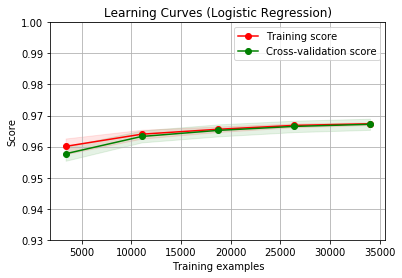

In [73]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    print(train_sizes)
    print(train_scores_mean)
    print(train_sizes)
    print(test_scores_mean)
    plt.legend(loc="best")
    plt.show()
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.93, 1.00), cv=cv, n_jobs=4)
#plt.show()

In [74]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (11000, 26)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,home_ownership,annual_inc,verification_status,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,emp_length,term,revol_util,int_rate,loan_status
0,-0.484427,-0.464802,-1.161098,-0.389948,0.466428,-0.569157,-0.025536,1.016519,-0.708299,0.813482,1.219826,0.248158,-0.367126,-1.038299,-0.306215,-0.409403,-0.193745,-0.140082,-0.088852,-0.540856,0.0,-1.130202,-0.589251,-0.055181,-0.691595,1.0
1,-0.470932,-0.450808,-0.357199,-0.314508,-0.228841,-0.569157,-0.022728,-1.305090,-0.708299,0.145973,2.079050,-0.010736,-0.672006,-0.599024,-0.729418,-0.324449,-0.193745,-0.120101,-0.088852,-0.537403,0.0,-1.130202,-0.589251,1.388225,0.376154,0.0
2,0.865056,0.934535,0.958373,0.613510,-2.314648,1.001638,0.325547,-1.305090,0.601639,1.035986,-0.032787,0.938541,0.274806,0.255802,-0.457060,1.984629,8.352082,0.748235,-0.048619,-0.588394,0.0,-0.841339,1.691621,1.353020,1.710841,0.0
3,1.877169,1.984038,2.076877,1.222871,-0.228841,1.001638,1.168148,-1.305090,-0.053330,1.703495,2.719710,0.852243,0.545003,0.622944,-0.498224,1.007875,-0.193745,7.998445,4.600080,-0.584905,0.0,1.469571,1.691621,0.437689,0.376154,0.0
4,-0.079582,-0.045001,0.032964,0.122575,0.466428,1.001638,-0.084128,1.016519,1.911576,-0.521537,-0.132940,0.334456,0.048928,0.111090,0.116019,-0.106260,-0.193745,-0.140082,-0.088852,-0.052065,0.0,0.891843,-0.589251,0.191254,-0.157720,0.0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1],
                                                    data_clean.iloc[:,-1], test_size=0.2, random_state=42)
X_train.shape

(8800, 25)

In [76]:
# features = data_clean.columns
# fig, ax = plt.subplots()
# width=0.35
# ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
# ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
# ax.set_xticklabels(X_train.columns.values,rotation=90)
# plt.title('Feature Importance from DT')
# ax.set_ylabel('Normalized Gini Importance')

In [77]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
data_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,home_ownership,annual_inc,verification_status,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,emp_length,term,revol_util,int_rate,loan_status
0,-0.484427,-0.464802,-1.161098,-0.389948,0.466428,-0.569157,-0.025536,1.016519,-0.708299,0.813482,1.219826,0.248158,-0.367126,-1.038299,-0.306215,-0.409403,-0.193745,-0.140082,-0.088852,-0.540856,0.0,-1.130202,-0.589251,-0.055181,-0.691595,1.0
1,-0.470932,-0.450808,-0.357199,-0.314508,-0.228841,-0.569157,-0.022728,-1.305090,-0.708299,0.145973,2.079050,-0.010736,-0.672006,-0.599024,-0.729418,-0.324449,-0.193745,-0.120101,-0.088852,-0.537403,0.0,-1.130202,-0.589251,1.388225,0.376154,0.0
2,0.865056,0.934535,0.958373,0.613510,-2.314648,1.001638,0.325547,-1.305090,0.601639,1.035986,-0.032787,0.938541,0.274806,0.255802,-0.457060,1.984629,8.352082,0.748235,-0.048619,-0.588394,0.0,-0.841339,1.691621,1.353020,1.710841,0.0
3,1.877169,1.984038,2.076877,1.222871,-0.228841,1.001638,1.168148,-1.305090,-0.053330,1.703495,2.719710,0.852243,0.545003,0.622944,-0.498224,1.007875,-0.193745,7.998445,4.600080,-0.584905,0.0,1.469571,1.691621,0.437689,0.376154,0.0
4,-0.079582,-0.045001,0.032964,0.122575,0.466428,1.001638,-0.084128,1.016519,1.911576,-0.521537,-0.132940,0.334456,0.048928,0.111090,0.116019,-0.106260,-0.193745,-0.140082,-0.088852,-0.052065,0.0,0.891843,-0.589251,0.191254,-0.157720,0.0


0.9554545454545454


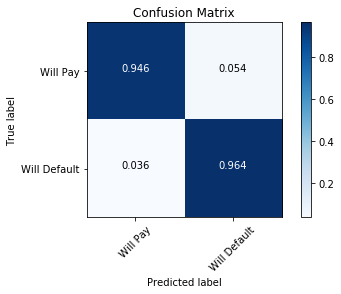

In [79]:
#SVM
from sklearn import svm
clf = svm.SVC(C = 10,gamma='scale')
clf.fit(X_train,y_train )
pred = clf.predict(X_test)
SVM_Accuracy = accuracy_score(y_test,pred)
print(SVM_Accuracy)
plot_confusion_matrix(pred, normalize=True)

[ 880 2860 4840 6820 8800]
[0.98156818 0.97918531 0.97867975 0.97857331 0.97830455]
[ 880 2860 4840 6820 8800]
[0.92140909 0.94556364 0.95279545 0.95637273 0.95892273]


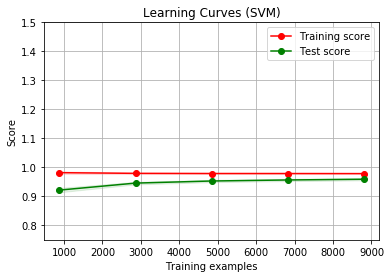

In [39]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    print(train_sizes)
    print(train_scores_mean)
    print(train_sizes)
    print(test_scores_mean)
    plt.legend(loc="best")
    plt.show()
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = clf
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.75, 1.5), cv=cv, n_jobs=4)
#plt.show()

0.8468181818181818


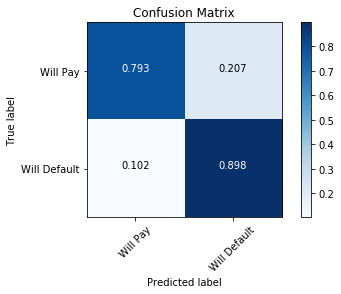

In [80]:
#KNN
clf_knn = KNeighborsClassifier(n_neighbors = 5)
clf_knn.fit(X_train,y_train)
pred = clf_knn.predict(X_test)
KNN_Accuracy = accuracy_score(y_test,pred)
print(KNN_Accuracy)
plot_confusion_matrix(pred, normalize=True)

[ 880 2860 4840 6820 8800]
[0.8725     0.88776224 0.89363017 0.89797947 0.90036023]
[ 880 2860 4840 6820 8800]
[0.79902273 0.82532727 0.83568636 0.84311818 0.84675909]


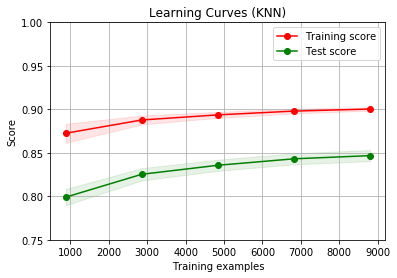

In [88]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    print(train_sizes)
    print(train_scores_mean)
    print(train_sizes)
    print(test_scores_mean)
    plt.legend(loc="best")
    plt.show()
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = clf_knn
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.75, 1.00), cv=cv, n_jobs=4)
#plt.show()

0.9727272727272728


Text(0, 0.5, 'Entropy')

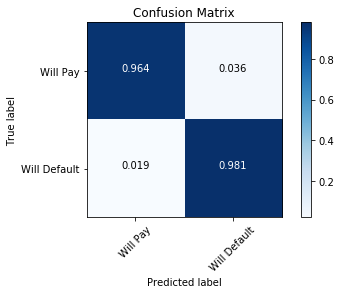

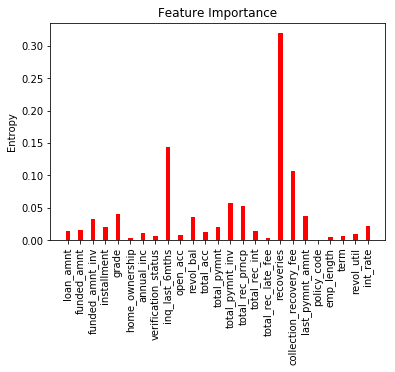

In [83]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
DT_Accuracy = accuracy_score(y_test,pred)
print(DT_Accuracy)
plot_confusion_matrix(pred, normalize=True)

fig, ax = plt.subplots()
width=0.35
features = data_clean.columns
ax.bar(np.arange(len(features)-1),clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance')
ax.set_ylabel('Entropy')

[ 880 2860 4840 6820 8800]
[1.         1.         0.99998967 0.99999413 0.99999773]
[ 880 2860 4840 6820 8800]
[0.95938636 0.96764091 0.97075455 0.97265909 0.97442273]


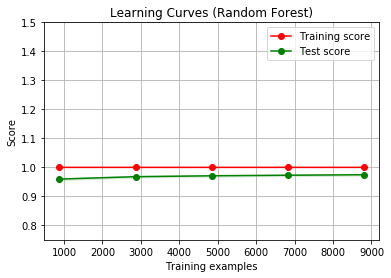

In [85]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    print(train_sizes)
    print(train_scores_mean)
    print(train_sizes)
    print(test_scores_mean)
    plt.legend(loc="best")
    plt.show()
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = clf
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.75, 1.50), cv=cv, n_jobs=4)
#plt.show()

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
4
0.9490909090909091


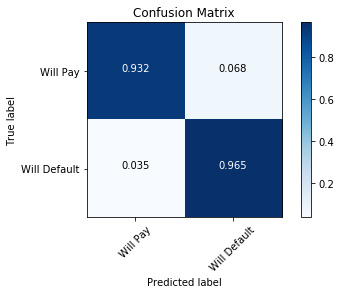

In [86]:
#MLP
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, activation='tanh')
print(clf_NN)
clf_NN.fit(X_train,y_train)  
print(clf_NN.n_layers_)

predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)
plot_confusion_matrix(predict_NN, normalize=True)

[ 880 2860 4840 6820 8800]
[0.83272727 0.92553846 0.94845041 0.95689589 0.96003977]
[ 880 2860 4840 6820 8800]
[0.82090455 0.91894091 0.94256364 0.95181818 0.95566364]


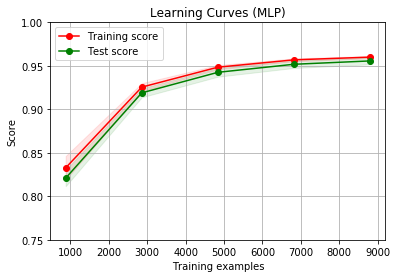

In [87]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    print(train_sizes)
    print(train_scores_mean)
    print(train_sizes)
    print(test_scores_mean)
    plt.legend(loc="best")
    plt.show()
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = clf_NN
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.75, 1.00), cv=cv, n_jobs=4)
#plt.show()